In [256]:
#Read up on min batch
#We need to crop sizes to same square sizes as what we have
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import skimage

ModuleNotFoundError: No module named 'sklearn'

In [150]:
#Load Image
img = plt.imread('ISIC_0024307.jpg')
tf_img = tf.convert_to_tensor(img)

In [250]:
#tf.set_random_seed(999) #set random seed

# random horizontal and vertical flip
brght_img = tf.image.random_flip_left_right(tf_img)
brght_img = tf.image.random_flip_up_down(brght_img)

# Rotation
angle = tf.random_uniform([1], minval=0, maxval=6, dtype=tf.float32, seed=None, name=None)
brght_img = tf.contrib.image.rotate(brght_img, angles=angle) #angle is in radians



#random brightness
#brght_img = tf.image.random_brightness(brght_img, max_delta=0.5)
#random contrats
#brght_img = tf.image.random_contrast(brght_img, lower = 1, upper = 2) #needs tuning
#brght_img = tf.image.random_hue(brght_img, max_delta = 0.5) #funny coloring
#brght_img = tf.image.random_saturation(brght_img, lower = 1, upper = 1.5)
#Gaussian noise
noise = tf.random_normal(shape=tf.shape(brght_img), mean=0.0, stddev=10, dtype=tf.float32)
noise = tf.cast(noise, dtype = tf.uint8)
brght_img = tf.add(brght_img,noise)

# Rotation
angle = tf.random_uniform([1], minval=0, maxval=6, dtype=tf.float32, seed=None, name=None)
brght_img = tf.contrib.image.rotate(brght_img, angles=angle) #angle is in radians

In [251]:
with tf.Session() as sess:
    image = sess.run(brght_img)
    print(sess.run(angle))

[3.482375]


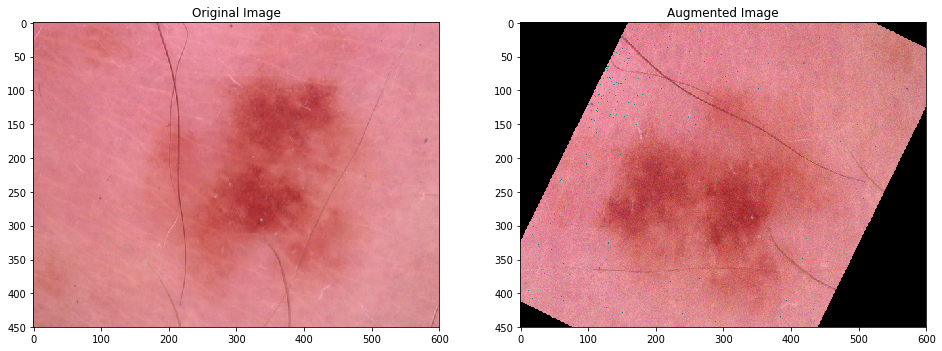

In [252]:
plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Augmented Image')
plt.imshow(image);